In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.formatter.useoffset'] = False

#%load_ext rpy2.ipython



In [2]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

In [3]:
## Loading the big dataframe
alldata = pd.read_csv('../../../big_dataframe_Xist.txt',sep="\t",header=0,index_col=0)


In [4]:
alldata.head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
0,1,C,0,0,0.0,0,0,0,0,0,0,9.079400e-11,3.025526e-31,0
1,2,G,0,0,0.0,0,0,0,0,0,0,2.755947e-03,2.754797e-03,0
2,3,G,0,0,0.0,0,0,0,0,0,0,4.410761e-35,2.410406e-65,0
3,4,C,0,0,0.0,0,0,0,0,0,0,2.754800e-03,2.754800e-03,0
4,5,T,0,0,0.0,0,0,0,0,0,0,3.113083e-30,1.367282e-82,0


### Count number of DRNs in diffBUM_HMM data:

In [5]:
threshold = 0.9

counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['diffBUMHMM_ex_vivo'] > threshold:
        counter = counter+1    
    elif row['diffBUMHMM_in_cell'] > threshold:
        counter2= counter2 +1
    else:
        continue
        
print("ex_vivo\t",counter)
print("in_vivo\t",counter2)

ex_vivo	 1540
in_vivo	 173


### How many binding sites for each protein were found that overlapped with modified nucleotides in the ex vivo data?

In [6]:
morereactive_ex_vivo = alldata[alldata.diffBUMHMM_ex_vivo > threshold]
proteins = alldata.columns[5:11]

In [7]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))

CELF1	total_count:	51
FUS	total_count:	336
HuR	total_count:	86
PTBP1	total_count:	55
RBFOX2	total_count:	1
TARDBP	total_count:	59


### Same but in delta_SHAPE

In [8]:
alldata[alldata.DeltaSHAPE_ex_vivo > 0].head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
209,210,T,1,0,1.365817,0,0,0,0,0,0,3.708979e-10,9.999481e-01,1
210,211,T,1,0,1.504202,0,0,0,0,0,0,2.100749e-37,4.045508e-112,1
211,212,T,1,0,1.721811,0,0,0,0,0,0,2.231493e-05,1.270037e-01,1
243,244,A,1,0,1.628085,0,0,1,0,0,0,2.413141e-08,1.257949e-17,1
244,245,T,1,0,2.116178,0,0,1,0,0,0,8.612534e-06,9.395486e-05,1


In [9]:
counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['DeltaSHAPE_ex_vivo'] > 0.0:
        counter = counter+1    
    elif row['DeltaSHAPE_in_cell'] > 0.0:
        counter2= counter2 +1
    else:
        continue
        
print("dSHAPE ex vivo %s" % counter)
print("dSHAPE in vivo %s" % counter2)

dSHAPE ex vivo 866
dSHAPE in vivo 683


In [10]:
morereactive_ex_vivo = alldata[alldata.DeltaSHAPE_ex_vivo > 0]

In [11]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))

CELF1	total_count:	104
FUS	total_count:	162
HuR	total_count:	171
PTBP1	total_count:	95
RBFOX2	total_count:	3
TARDBP	total_count:	8


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


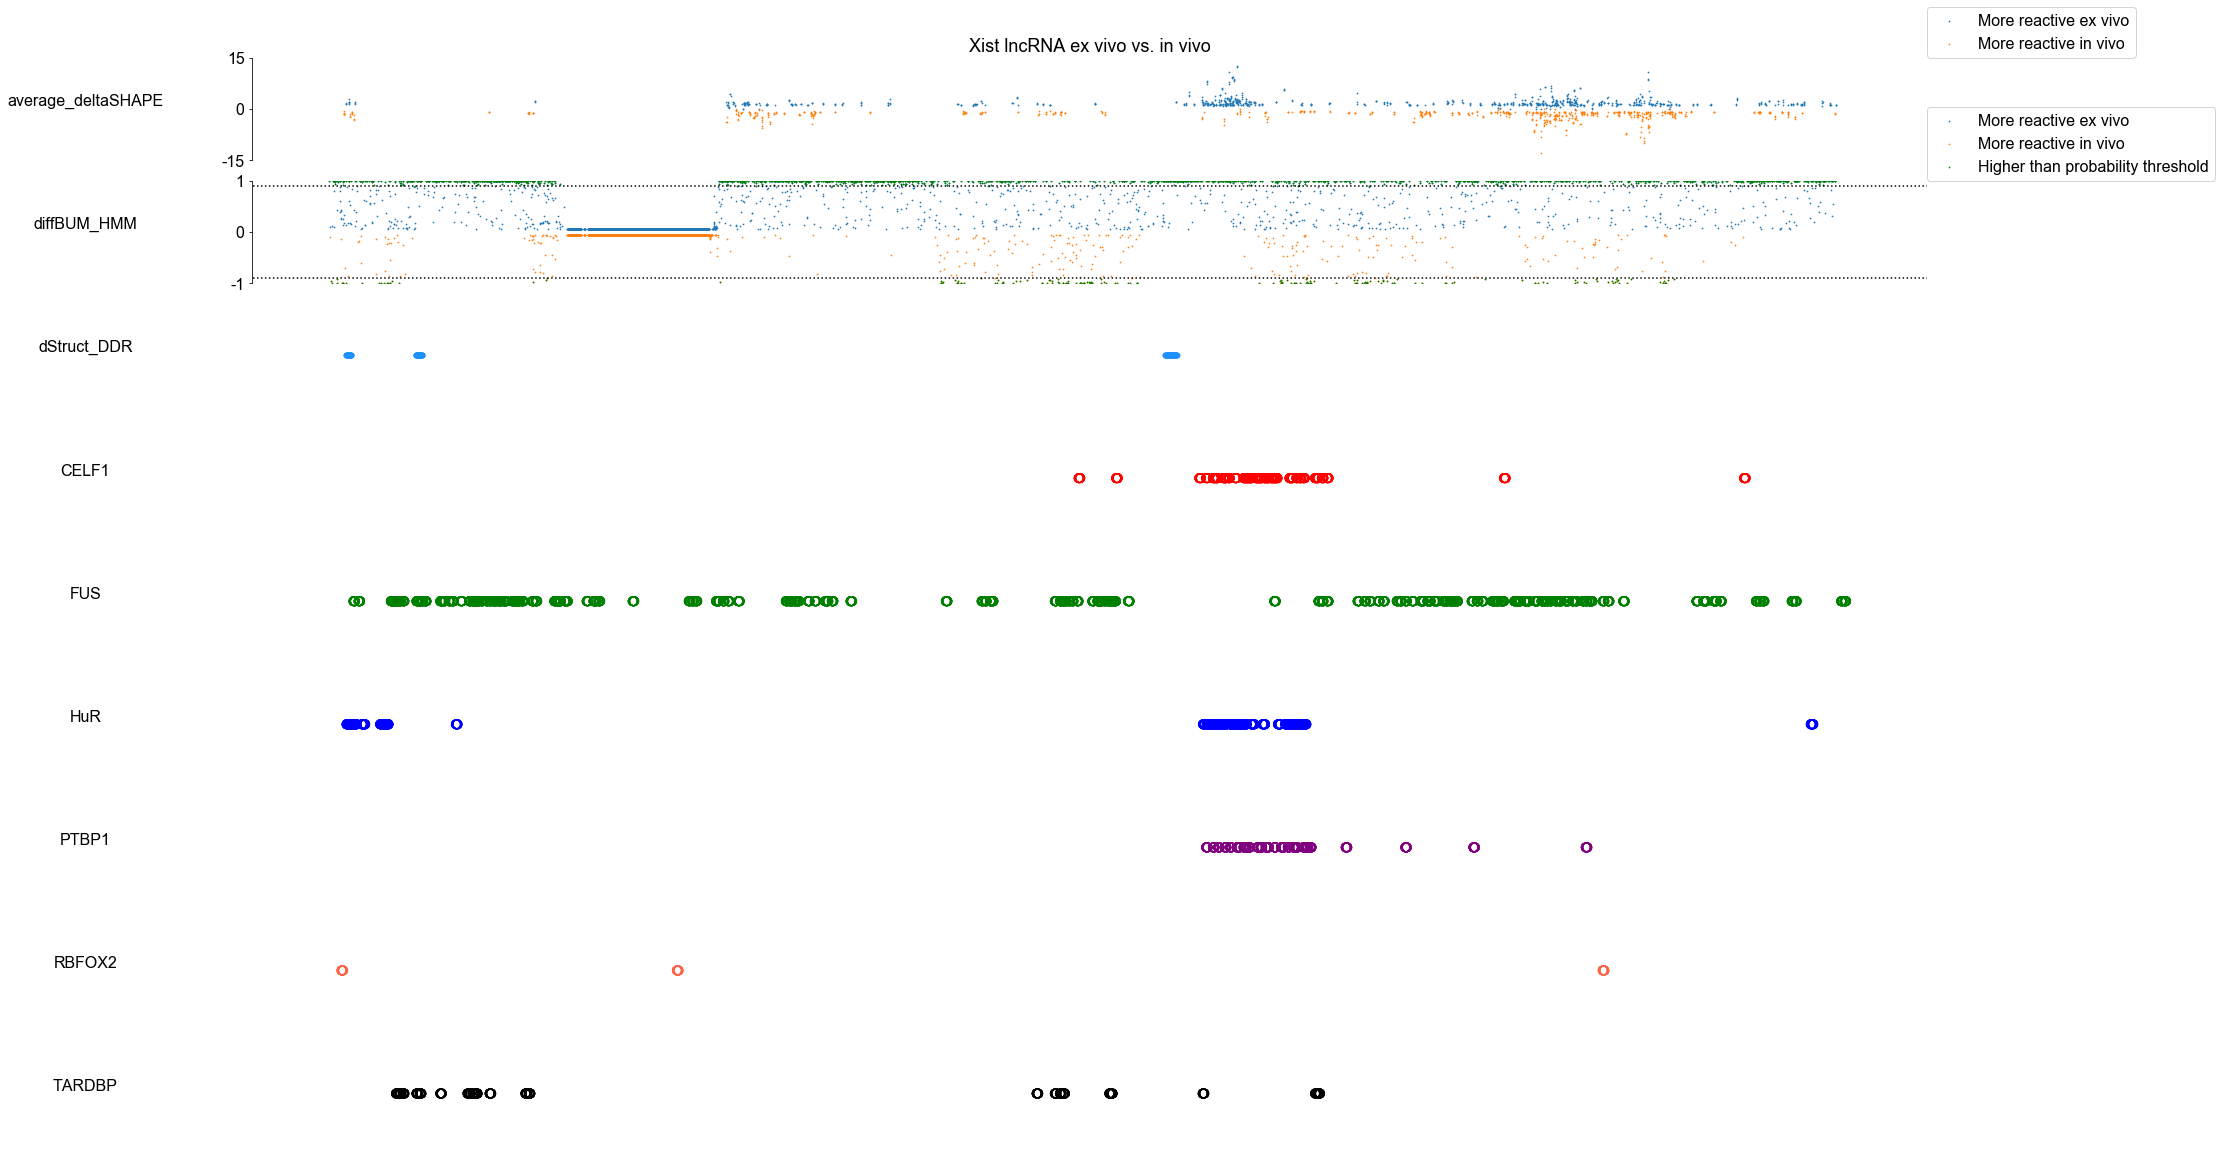

In [13]:
count = 0
numberofplots = 9

fig,ax = plt.subplots(numberofplots,figsize=[30,20],sharex=True)
plusvalues = alldata[alldata['average_deltaSHAPE'] > 0]
x = plusvalues.index
y = plusvalues['average_deltaSHAPE'].values
exvivo = ax[count].scatter(x,y, s=0.5)
minusvalues = alldata[alldata['average_deltaSHAPE'] < 0]
x = minusvalues.index
y = minusvalues['average_deltaSHAPE'].values
invivo = ax[count].scatter(x,y,s=0.5)
xticks = list(np.arange(1,len(alldata.index),1000))
ymin = -15
ymax = 15
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'average_deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)





ax[count].set_title('Xist lncRNA ex vivo vs. in vivo',fontsize=18)
ax[count].legend((exvivo,invivo), ('More reactive ex vivo', 'More reactive in vivo'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

exvivo = alldata['diffBUMHMM_ex_vivo']
invivo = alldata['diffBUMHMM_in_cell']

#exvivo[exvivo < threshold] = np.nan
#invivo[invivo < threshold] = np.nan


### Only plotting everything that is higher than 0.05
exvivo[exvivo < 0.05] = np.nan
invivo[invivo < 0.05] = np.nan

x = exvivo.index
y = exvivo.values
plus = ax[count].scatter(x,y,s=0.5)
greater_than_threshold_plus = [i for i, val in enumerate(y) if val>threshold]

plus_threshold= ax[count].scatter(x[greater_than_threshold_plus],y[greater_than_threshold_plus],s=0.5, c='g')




x = invivo.index
y = -invivo.values
minus = ax[count].scatter(x,y,s=0.5)
greater_than_threshold_minus= [i for i, val in enumerate(y) if val *(-1)>threshold]
minus_threshold= ax[count].scatter(x[greater_than_threshold_minus],y[greater_than_threshold_minus],s=0.5, c='g')

ax[count].legend((plus,minus, minus_threshold), ('More reactive ex vivo', 'More reactive in vivo', 'Higher than probability threshold'), loc=[1,1], fontsize = 16)
ymin = -1
ymax = 1
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].axhline(y=threshold, color='k', linestyle=':')
neg_threshold = threshold * (-1)
ax[count].axhline(y=neg_threshold, color='k', linestyle=':')





count += 1
name = 'dStruct_DDR'
selection = alldata[name][alldata[name] > 0]
x = selection.index
y = selection.values
ax[count].scatter(x,y,s=20, facecolors='dodgerblue', edgecolors='dodgerblue')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'CELF1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].set_yticks([1])
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='r')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'FUS'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='green')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'HuR'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='blue')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'PTBP1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='purple')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'RBFOX2'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='tomato')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'TARDBP'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='black')
formatAxes(ax[count],ylabel=name,text_size=16)

fig.align_ylabels()
output_filename = "diffBUM_HMM_Xist_ex_vivo_vs_in_vivo_"+ str(threshold) +".pdf"
fig.savefig(output_filename, dpi= 300)